In [87]:
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np        
import seaborn as sns
import matplotlib.patches as mpatches

# home value data
HV_file="County_MedianValuePerSqft_AllHo.csv"
home_value_df = pd.read_csv(HV_file)
home_value_df=home_val_df.sort_values("MedianValuePerSqft",ascending = False) 
home_value_df


In [21]:
#census data 
census_df=pd.read_csv("Resources/census_data.csv")                              
county=[census_df["County"][x].split()[0] for x in range(5)]           
census_df["County"]=county     
census_df

,State,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,27,Itasca,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,42156.0,150.0,1394.0,174.0,0.0,2443.0,10824.0,11911.0,4660.0,1960.0
1,27,Hennepin,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,869704.0,130404.0,9343.0,68523.0,515.0,60019.0,151220.0,215800.0,223883.0,111801.0
2,27,Ramsey,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,365854.0,52512.0,3481.0,55933.0,220.0,32867.0,77123.0,88169.0,76600.0,49465.0
3,27,Stearns,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,137089.0,3847.0,424.0,2840.0,40.0,9065.0,27904.0,31373.0,14321.0,6804.0
4,27,Steele,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,34107.0,935.0,35.0,306.0,0.0,2554.0,8625.0,7694.0,3824.0,1505.0


In [103]:
#County_Race_Education_df= census_df [["County", "Per Capita Income", "Median Age"]]
County_Race_Education_df= census_df [[ "County", "White", "Black or African American", "American Indian or Alaska Native",
                      "Asian", "Hawaiian or Other Pacific Islander",
                       "Less Than High School", "High School", "Some College or Associate's Degree", 
                       "Bachelor's Degree", "Graduate or Professional Degree"]]

merge_df=pd.merge(home_val_df,County_Race_Education_df,how='outer',on="County")
#merge_df.set_index('County', inplace=True)
merge_df

,Year,County,MedianValuePerSqft,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,2010,Hennepin,150,869704.0,130404.0,9343.0,68523.0,515.0,60019.0,151220.0,215800.0,223883.0,111801.0
1,2010,Ramsey,122,365854.0,52512.0,3481.0,55933.0,220.0,32867.0,77123.0,88169.0,76600.0,49465.0
2,2010,Itasca,95,42156.0,150.0,1394.0,174.0,0.0,2443.0,10824.0,11911.0,4660.0,1960.0
3,2010,Stearns,87,137089.0,3847.0,424.0,2840.0,40.0,9065.0,27904.0,31373.0,14321.0,6804.0
4,2010,Steele,77,34107.0,935.0,35.0,306.0,0.0,2554.0,8625.0,7694.0,3824.0,1505.0


In [112]:
all_names_index = merge_df.set_index(['County','MedianValuePerSqft',"Less Than High School", "High School", "Some College or Associate's Degree", 
                       "Bachelor's Degree", "Graduate or Professional Degree"]).sort_index()
all_names_index

,,,,,,,Year,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander
County,MedianValuePerSqft,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree,,,,,,
Hennepin,150,60019.0,151220.0,215800.0,223883.0,111801.0,2010,869704.0,130404.0,9343.0,68523.0,515.0
Itasca,95,2443.0,10824.0,11911.0,4660.0,1960.0,2010,42156.0,150.0,1394.0,174.0,0.0
Ramsey,122,32867.0,77123.0,88169.0,76600.0,49465.0,2010,365854.0,52512.0,3481.0,55933.0,220.0
Stearns,87,9065.0,27904.0,31373.0,14321.0,6804.0,2010,137089.0,3847.0,424.0,2840.0,40.0
Steele,77,2554.0,8625.0,7694.0,3824.0,1505.0,2010,34107.0,935.0,35.0,306.0,0.0


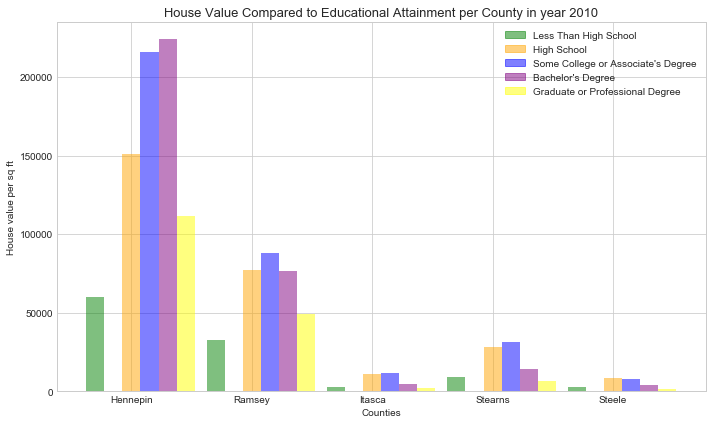

In [147]:
x=np.arange(len(merge_df['County']))
opacity=0.5 #Not so dark
bar_width= 0.15

#plot data
#use zorder to put bars in front of grid
plt.rcParams['figure.figsize']=(10,6)
plt.bar(x, merge_df["Less Than High School"], width=bar_width, color='g', alpha=opacity)
plt.bar(x+bar_width*2, merge_df["High School"], width=bar_width, color='orange', alpha=opacity)
plt.bar(x+bar_width*3, merge_df["Some College or Associate's Degree"], width=bar_width, color='blue', alpha=opacity)
plt.bar(x+bar_width*4, merge_df["Bachelor's Degree"], width=bar_width, color='purple', alpha=opacity)
plt.bar(x+bar_width*5, merge_df["Graduate or Professional Degree"], width=bar_width, color='yellow', alpha=opacity)

#Adjust x until it is centered
plt.xticks(x + bar_width*2, merge_df['County'])
plt.title('House Value Compared to Educational Attainment per County in year 2010', fontsize = 13)
plt.ylabel('House value per sq ft', fontsize=10)
plt.xlabel('Counties', fontsize=10)

#legend
less_highschool_patch=mpatches.Patch(color='g', label='Less Than High School',alpha=opacity)
highschool_patch=mpatches.Patch(color='orange', label="High School", alpha=opacity)
associate_patch=mpatches.Patch(color='blue', label="Some College or Associate's Degree", alpha=opacity)
bachelor_patch=mpatches.Patch(color='purple', label="Bachelor's Degree", alpha=opacity)
graduate_patch=mpatches.Patch(color='yellow', label='Graduate or Professional Degree', alpha=opacity)
plt.legend(handles=[less_highschool_patch, highschool_patch, associate_patch, bachelor_patch, graduate_patch], loc='upper right')
plt.grid(axis='Less Than High School')

plt.tight_layout()
plt.show()


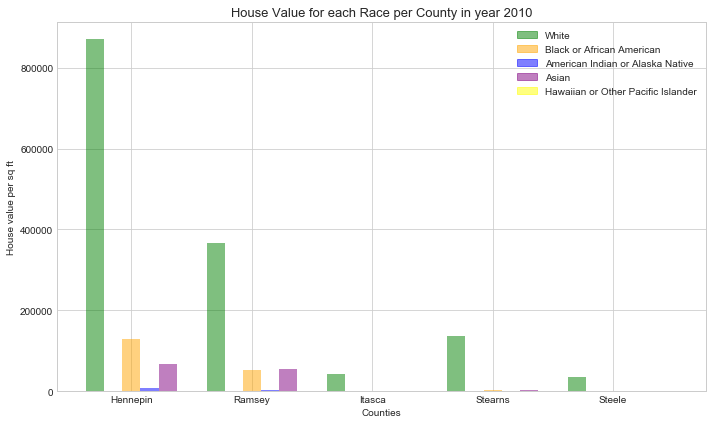

In [130]:
x=np.arange(len(merge_df['County']))
opacity=0.5 #Not so dark
bar_width= 0.15

#plot data
#use zorder to put bars in front of grid
plt.rcParams['figure.figsize']=(10,6)
plt.bar(x, merge_df["White"], width=bar_width, color='g', alpha=opacity)
plt.bar(x+bar_width*2, merge_df["Black or African American"], width=bar_width, color='orange', alpha=opacity)
plt.bar(x+bar_width*3, merge_df["American Indian or Alaska Native"], width=bar_width, color='blue', alpha=opacity)
plt.bar(x+bar_width*4, merge_df["Asian"], width=bar_width, color='purple', alpha=opacity)
plt.bar(x+bar_width*5, merge_df["Hawaiian or Other Pacific Islander"], width=bar_width, color='yellow', alpha=opacity)

#Adjust x until it is centered
plt.xticks(x + bar_width*2, merge_df['County'])
plt.title('House Value for each Race per County in year 2010', fontsize = 13)
plt.ylabel('House value per sq ft', fontsize=10)
plt.xlabel('Counties', fontsize=10)

#legend
white_patch=mpatches.Patch(color='g', label='White',alpha=opacity)
black_patch=mpatches.Patch(color='orange', label='Black or African American', alpha=opacity)
American_Indian_patch=mpatches.Patch(color='blue', label='American Indian or Alaska Native', alpha=opacity)
Asian_patch=mpatches.Patch(color='purple', label='Asian', alpha=opacity)
Hawaiian_patch=mpatches.Patch(color='yellow', label='Hawaiian or Other Pacific Islander', alpha=opacity)
plt.legend(handles=[white_patch, black_patch, American_Indian_patch, Asian_patch, Hawaiian_patch], loc='upper right')
plt.grid(axis='white')

plt.tight_layout()
plt.show()
